<ipython-input-2-726b8a277276>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=df_sorted.head(10), palette='viridis')


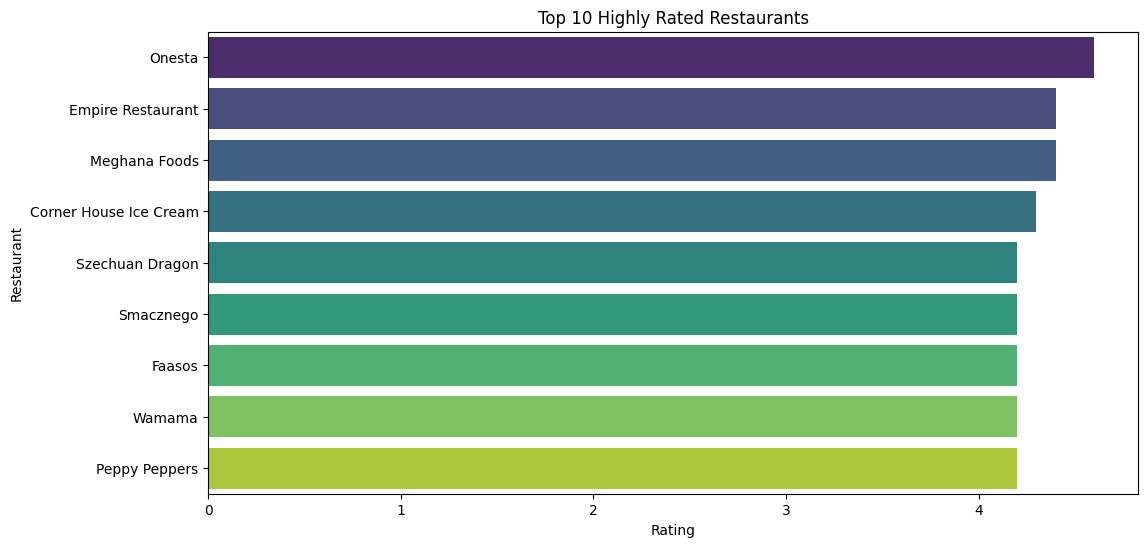

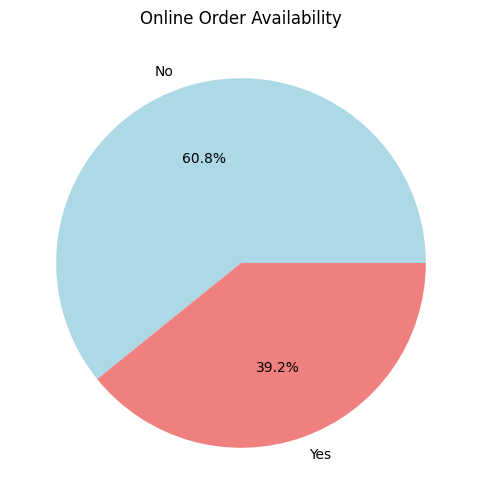

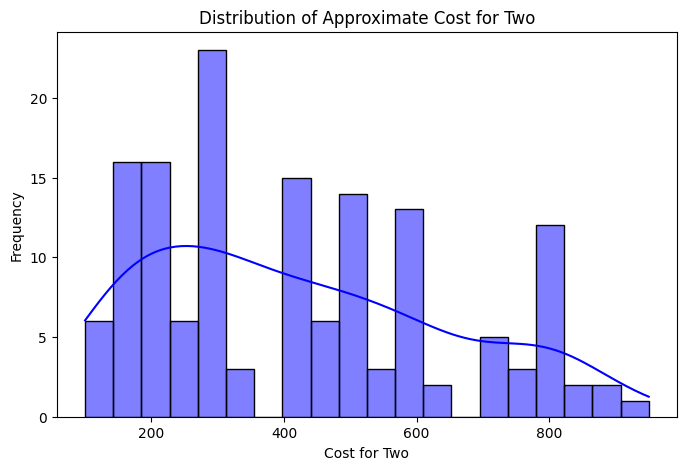

<ipython-input-2-726b8a277276>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='restaurant_type', data=df, order=df['restaurant_type'].value_counts().index, palette='coolwarm')


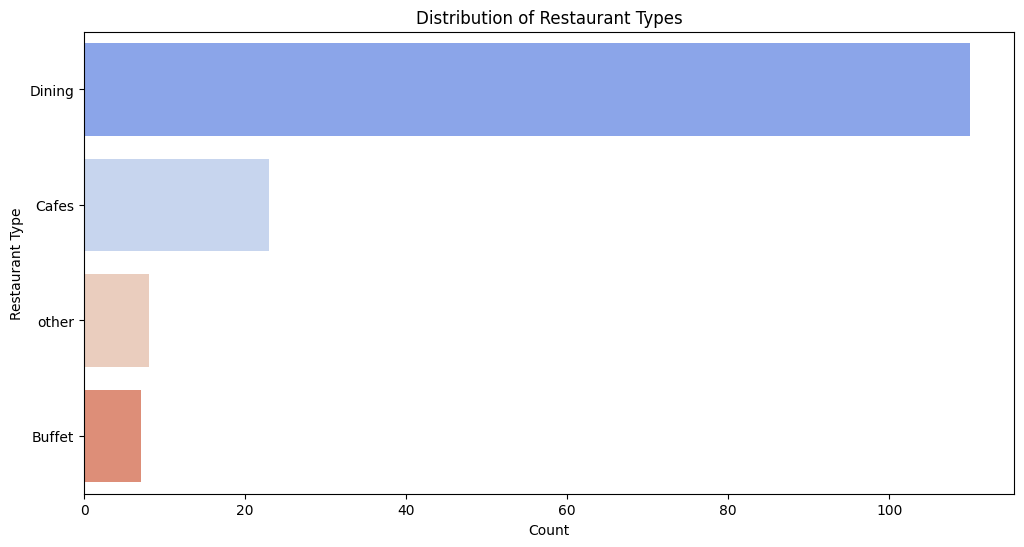

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Zomato-data-.csv"
df = pd.read_csv("/content/Zomato-data-.csv")

# Clean column names
df.rename(columns={
    'approx_cost(for two people)': 'cost_for_two',
    'listed_in(type)': 'restaurant_type',
    'rate': 'rating'
}, inplace=True)

# Clean 'rating' column
df['rating'] = df['rating'].replace({'/5': ''}, regex=True)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Sort by rating and votes
df_sorted = df.sort_values(by=['rating', 'votes'], ascending=[False, False])

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x='rating', y='name', data=df_sorted.head(10), palette='viridis')
plt.title('Top 10 Highly Rated Restaurants')
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.show()

# Pie chart for online order availability
plt.figure(figsize=(6,6))
df['online_order'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Online Order Availability')
plt.ylabel('')
plt.show()

# Histogram for cost distribution
plt.figure(figsize=(8,5))
sns.histplot(df['cost_for_two'], bins=20, kde=True, color='blue')
plt.title('Distribution of Approximate Cost for Two')
plt.xlabel('Cost for Two')
plt.ylabel('Frequency')
plt.show()

# Count plot for restaurant type
plt.figure(figsize=(12,6))
sns.countplot(y='restaurant_type', data=df, order=df['restaurant_type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()
